In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
import os



sys.path.append(os.path.abspath("Problema 1/src"))

from preprocessing import knn_imputer, knn_imputer_auto, smote_oversample, knn_impute_from_train, replace_outliers_with_nan
from models import LogisticRegressionL2
from metrics import report_metrics, pr_curve, roc_curve, compute_f1

sys.path.append(os.path.abspath("Problema 2/src"))
from models_multiclass import LDA, RandomForest
from metrics_multiclass import report_metrics_multiclass_global, comparar_modelos_macro_roc_pr, f1_macro, confusion_matrix_multiclass







In [ ]:

df = pd.read_csv("Problema 1/data/raw/cell_diagnosis_dev.csv")

dev = df.sample(frac=0.8, random_state=42)
dev.to_csv("Problema 1/data/processed/cell_diagnosis_dev_balanced.csv", index=False)
val = df.drop(dev.index)
val.to_csv("Problema 1/data/processed/cell_diagnosis_val_balanced.csv", index=False)

df_imbalanced= pd.read_csv("Problema 1/data/raw/cell_diagnosis_dev_imbalanced.csv")
dev_imbalanced = df_imbalanced.sample(frac=0.8, random_state=42)
dev_imbalanced.to_csv("Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv", index=False)
val_imbalanced = df_imbalanced.drop(dev_imbalanced.index)
val_imbalanced.to_csv("Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv", index=False)


1.1

In [ ]:
dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
val = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv')
test = pd.read_csv('Problema 1/data/raw/cell_diagnosis_test.csv')
dev_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')
test_imbalanced = pd.read_csv('Problema 1/data/raw/cell_diagnosis_test_imbalanced.csv')

num_cols = dev.select_dtypes(include='number').columns
dev[num_cols] = df[num_cols].mask(df[num_cols] < 0)
val[num_cols] = df[num_cols].mask(df[num_cols] < 0)
test[num_cols] = df[num_cols].mask(df[num_cols] < 0)
dev_imbalanced[num_cols] = df_imbalanced[num_cols].mask(df_imbalanced[num_cols] < 0)
val_imbalanced[num_cols] = df_imbalanced[num_cols].mask(df_imbalanced[num_cols] < 0)    
test_imbalanced = df_imbalanced[num_cols].mask(df_imbalanced[num_cols] < 0)

dev.to_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv', index=False)
val.to_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv', index=False)
test.to_csv('Problema 1/data/processed/cell_diagnosis_test_balanced.csv', index=False)
dev_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv', index=False)
val_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv', index=False)
test_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv', index=False)


In [ ]:
dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
val = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv')
test = pd.read_csv('Problema 1/data/raw/cell_diagnosis_test.csv')
dev_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')
test_imbalanced = pd.read_csv('Problema 1/data/raw/cell_diagnosis_test_imbalanced.csv')

dev['GeneticMutation'] = dev['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})
val['GeneticMutation'] = val['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})
test['GeneticMutation'] = test['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})
dev_imbalanced['GeneticMutation'] = dev_imbalanced['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})
val_imbalanced['GeneticMutation'] = val_imbalanced['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})
test_imbalanced['GeneticMutation'] = test_imbalanced['GeneticMutation'].replace({'Presnt': 1, 'Absnt': 0})



#reemplazar los valores ??? por NaN
dev = dev.replace('???', np.nan)
val = val.replace('???', np.nan)
test = test.replace('???', np.nan)
dev_imbalanced = dev_imbalanced.replace('???', np.nan)
val_imbalanced = val_imbalanced.replace('???', np.nan)
test_imbalanced = test_imbalanced.replace('???', np.nan)
numeric_features = ['CellSize','CellShape','NucleusDensity','ChromatinTexture','CytoplasmSize'
                    ,'CellAdhesion','MitosisRate','NuclearMembrane','GrowthFactor','OxygenSaturation',
                    'Vascularization','InflammationMarkers','Diagnosis','CellType', 'GeneticMutation']
#features que sea numeric features pero sin CellType
features = numeric_features.copy()
features.remove('CellType')
dev = knn_imputer(dev,features,['CellType'])
dev_imbalanced = knn_imputer(dev_imbalanced,features,['CellType'])

dev_known = dev[dev['CellType'].notna()]
dev_imbalanced_known = dev_imbalanced[dev_imbalanced['CellType'].notna()]


val = knn_impute_from_train(dev_known, val, features, 'CellType')
test = knn_impute_from_train(dev_known, test, features, 'CellType')

val_imbalanced = knn_impute_from_train(dev_imbalanced_known, val_imbalanced, features, 'CellType')
test_imbalanced = knn_impute_from_train(dev_imbalanced_known, test_imbalanced, features, 'CellType')






dev['CellType'] = dev['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})
val['CellType'] = val['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})
test['CellType'] = test['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})
dev_imbalanced['CellType'] = dev_imbalanced['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})
val_imbalanced['CellType'] = val_imbalanced['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})
test_imbalanced['CellType'] = test_imbalanced['CellType'].replace({'Epthlial': 1, 'Mesnchymal': 0})



dev.to_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv', index=False)
val.to_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv', index=False)
test.to_csv('Problema 1/data/processed/cell_diagnosis_test_balanced.csv', index=False)
dev_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv', index=False)
val_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv', index=False)
test_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv', index=False)


In [ ]:

dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
dev_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')

columns_to_exclude = ['CellType', 'Diagnosis', 'GeneticMutation']

dev = replace_outliers_with_nan(dev, exclude_columns=columns_to_exclude)
dev_imbalanced = replace_outliers_with_nan(dev_imbalanced, exclude_columns=columns_to_exclude)



dev.to_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv', index=False)
dev_imbalanced.to_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv', index=False)


In [ ]:

df = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')


# calcular la matriz de correlación
correlation_matrix = df.corr()
# crear un mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:

dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
val = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv')
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_balanced.csv')
dev_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')
test_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')


dev_complete = knn_imputer_auto(dev,dev)
val_complete = knn_imputer_auto(dev,val)
test_complete = knn_imputer_auto(dev,test)
dev_imbalanced_complete = knn_imputer_auto(dev_imbalanced,dev_imbalanced)
val_imbalanced_complete = knn_imputer_auto(dev_imbalanced,val_imbalanced)
test_imbalanced_complete = knn_imputer_auto(dev_imbalanced,test_imbalanced)



dev_complete.to_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv', index=False)
val_complete.to_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv', index=False)
test_complete.to_csv('Problema 1/data/processed/cell_diagnosis_test_balanced.csv', index=False)
dev_imbalanced_complete.to_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv', index=False)
val_imbalanced_complete.to_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv', index=False)
test_imbalanced_complete.to_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv', index=False)


In [ ]:
#generar una matriz de correlación del dataset balanceado

df = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
# calcular la matriz de correlación
correlation_matrix = df.corr()
# crear un mapa de calor
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

1.2


In [ ]:

train_dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_balanced.csv')
val_dev = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_balanced.csv')

features = train_dev.columns[train_dev.columns != 'Diagnosis']
target = 'Diagnosis'

# Calcular media y std SOLO del train
train_mean = train_dev[features].mean()
train_std = train_dev[features].std()

# Normalizar usando stats del train
train_dev[features] = (train_dev[features] - train_mean) / train_std 
val_dev[features] = (val_dev[features] - train_mean) / train_std

# Cross-validation
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_dev.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)

best_lambda = None
best_f1 = -1
f1_scores_mean = []


for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_dev.iloc[train_idx]
        fold_val = train_dev.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best λ: {best_lambda:.2f}')
plt.title('Lambda vs F1 Score (CV)')
plt.xlabel('Lambda')
plt.ylabel('F1 Score Promedio')
plt.grid()
plt.xticks(lambdas)
plt.legend()
plt.show()


final_model_balanced = LogisticRegressionL2(dataset=train_dev,target_name='Diagnosis',ridge_lambda=best_lambda)

X_val = val_dev[features].values
y_val = val_dev[target].values
y_pred_val = final_model_balanced.predict(X_val)
y_scores_val = final_model_balanced.predict_proba(X_val)


report_metrics(y_val, y_pred_val, y_scores_val)

1.3


In [ ]:

test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_balanced.csv')

test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test = test[target].values

y_pred_test = final_model_balanced.predict(x_test)
y_scores_test = final_model_balanced.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test, y_pred_test, y_scores_test)




1.4


1.4.1)

In [ ]:

train_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')

features = train_imbalanced.columns[train_imbalanced.columns != 'Diagnosis']
target = 'Diagnosis'
# Calcular media y std SOLO del train
train_mean = train_imbalanced[features].mean()
train_std = train_imbalanced[features].std()
# Normalizar usando stats del train
train_imbalanced[features] = (train_imbalanced[features] - train_mean) / train_std
val_imbalanced[features] = (val_imbalanced[features] - train_mean) / train_std
# Cross-validation 
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_imbalanced.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = []


for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_imbalanced.iloc[train_idx]
        fold_val = train_imbalanced.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")



plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()

# Entrenar modelo final con todo el training set y mejor lambda
final_model_umbalanced = LogisticRegressionL2(dataset=train_imbalanced, target_name='Diagnosis', ridge_lambda=best_lambda)

X_val_full = val_imbalanced[features].values
y_val_full_dev_umbalanced = val_imbalanced[target].values
y_pred_dev_umbalanced = final_model_umbalanced.predict(X_val_full)
y_scores_dev_umbalanced = final_model_umbalanced.predict_proba(X_val_full)

# Reportar métricas
report_metrics(y_val_full_dev_umbalanced, y_pred_dev_umbalanced, y_scores_dev_umbalanced)

In [ ]:
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')
test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test_umbalanced = test[target].values

y_pred_test_umbalanced = final_model_umbalanced.predict(x_test)
y_scores_test_umbalanced = final_model_umbalanced.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test_umbalanced, y_pred_test_umbalanced, y_scores_test_umbalanced)



1.4.2)


In [ ]:
#undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.
train_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')

#separar en clases 
class_0 = train_imbalanced[train_imbalanced['Diagnosis'] == 0]
class_1 = train_imbalanced[train_imbalanced['Diagnosis'] == 1]


# Calcular el número de muestras a eliminar
n_samples_to_remove = len(class_0) - len(class_1)
# Eliminar n_samples_to_remove muestras de la clase mayoritaria (clase 0)
class_0_reduced = class_0.sample(n=len(class_1), random_state=42)

# Combinar las clases
train_undersampled = pd.concat([class_0_reduced, class_1])
train_undersampled = train_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)


#entrenar un modelo de regresión logística binaria con regularización L2.
# Variables
features = train_undersampled.columns[train_undersampled.columns != 'Diagnosis']
target = 'Diagnosis'
# Calcular media y std SOLO del train
train_mean = train_undersampled[features].mean()
train_std = train_undersampled[features].std()
# Normalizar usando stats del train
train_undersampled[features] = (train_undersampled[features] - train_mean) / train_std
val_imbalanced[features] = (val_imbalanced[features] - train_mean) / train_std
# Cross-validation (manual) en training set
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_undersampled.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = []

for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_undersampled.iloc[train_idx]
        fold_val = train_undersampled.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")


# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()
# Entrenar modelo final con todo el training set y mejor lambda
final_model_undersampling = LogisticRegressionL2(dataset=train_undersampled, target_name='Diagnosis', ridge_lambda=best_lambda)   
# Predecir en validación completa
X_val_full = val_imbalanced[features].values
y_val_full_dev_undersamplirg = val_imbalanced[target].values
y_pred_dev_undersampling = final_model_undersampling.predict(X_val_full)
y_scores_dev_undersampling = final_model_undersampling.predict_proba(X_val_full)
# Reportar métricas
report_metrics(y_val_full_dev_undersamplirg, y_pred_dev_undersampling, y_scores_dev_undersampling)





In [ ]:
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')
test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test_undersampling = test[target].values

y_pred_test_undersampling = final_model_undersampling.predict(x_test)
y_scores_test_undersampling = final_model_undersampling.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test_undersampling, y_pred_test_undersampling, y_scores_test_undersampling)



1.4.3)

In [ ]:

train_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')
# Separar en clases
class_0 = train_imbalanced[train_imbalanced['Diagnosis'] == 0]
class_1 = train_imbalanced[train_imbalanced['Diagnosis'] == 1]

n_samples_to_duplicate = len(class_0) - len(class_1)

class_1_duplicated = class_1.sample(n=n_samples_to_duplicate, replace=True, random_state=42)
# Combinar las clases
train_oversampled = pd.concat([class_0, class_1, class_1_duplicated])
train_oversampled = train_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

features = train_oversampled.columns[train_oversampled.columns != 'Diagnosis']
target = 'Diagnosis'
# Calcular media y std SOLO del train
train_mean = train_oversampled[features].mean()
train_std = train_oversampled[features].std()
# Normalizar usando stats del train
train_oversampled[features] = (train_oversampled[features] - train_mean) / train_std
val_imbalanced[features] = (val_imbalanced[features] - train_mean) / train_std

# Cross-validation 
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_oversampled.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = [] 

for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_oversampled.iloc[train_idx]
        fold_val = train_oversampled.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')    
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()
# Entrenar modelo final con todo el training set y mejor lambda
final_model_oversampling = LogisticRegressionL2(dataset=train_oversampled, target_name='Diagnosis', ridge_lambda=best_lambda)

X_val_full = val_imbalanced[features].values
y_val_full_dev_oversampling = val_imbalanced[target].values
y_pred_dev_oversampling = final_model_oversampling.predict(X_val_full)
y_scores_dev_oversampling = final_model_oversampling.predict_proba(X_val_full)
# Reportar métricas
report_metrics(y_val_full_dev_oversampling, y_pred_dev_oversampling, y_scores_dev_oversampling)





In [ ]:
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')
test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test_oversampling = test[target].values

y_pred_test_oversampling = final_model_oversampling.predict(x_test)
y_scores_test_oversampling = final_model_oversampling.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test_oversampling, y_pred_test_oversampling, y_scores_test_oversampling)



1.4.4)


In [ ]:


train_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')
x = train_imbalanced.drop(columns=['Diagnosis'])
y = train_imbalanced['Diagnosis']

train_balanced = smote_oversample(x, y, k=5)


# Variables
features = train_balanced.columns[train_balanced.columns != 'Diagnosis']
target = 'Diagnosis'
# Calcular media y std SOLO del train
train_mean = train_balanced[features].mean()
train_std = train_balanced[features].std()
# Normalizar usando stats del train
train_balanced[features] = (train_balanced[features] - train_mean) / train_std
val_imbalanced[features] = (val_imbalanced[features] - train_mean) / train_std
# Cross-validation
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_balanced.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = [] 


for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_balanced.iloc[train_idx]
        fold_val =  train_balanced.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()

final_model_smote = LogisticRegressionL2(dataset=train_balanced, target_name='Diagnosis', ridge_lambda=best_lambda)

X_val_full = val_imbalanced[features].values
y_val_full_dev_smote = val_imbalanced[target].values
y_pred_dev_smote = final_model_smote.predict(X_val_full)
y_scores_dev_smote = final_model_smote.predict_proba(X_val_full)
# Reportar métricas
report_metrics(y_val_full_dev_smote, y_pred_dev_smote, y_scores_dev_smote)

In [ ]:
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')
test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test_smote = test[target].values

y_pred_test_smote = final_model_smote.predict(x_test)
y_scores_test_smote = final_model_smote.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test_smote, y_pred_test_smote, y_scores_test_smote)



In [ ]:

train_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_dev_imbalanced_complete.csv')
val_imbalanced = pd.read_csv('Problema 1/data/processed/cell_diagnosis_val_imbalanced_complete.csv')


counts = train_imbalanced['Diagnosis'].value_counts(normalize=True)
pi_min = counts.min()   # π1
pi_maj = counts.max()   # π2
c = pi_maj / pi_min
print(f'π1 (minoritaria): {pi_min:.3f}, π2 (mayoritaria): {pi_maj:.3f}, C = {c:.2f}')


# Variables
features = train_imbalanced.columns[train_imbalanced.columns != 'Diagnosis']
target = 'Diagnosis'
# Calcular media y std SOLO del train
train_mean = train_imbalanced[features].mean()
train_std = train_imbalanced[features].std()

# Normalizar usando stats del train
train_imbalanced[features] = (train_imbalanced[features] - train_mean) / train_std
val_imbalanced[features] = (val_imbalanced[features] - train_mean) / train_std
# Cross-validation 
lambdas = np.linspace(0, 100, 10)
k = 5
train_data_for_cv = train_imbalanced.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = []

for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = train_imbalanced.iloc[train_idx]
        fold_val = train_imbalanced.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='Diagnosis',ridge_lambda=lam, use_class_weights=True)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam

print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()
# Entrenar modelo final con todo el training set y mejor lambda
final_model_reweight = LogisticRegressionL2(dataset=train_imbalanced, target_name='Diagnosis', ridge_lambda=best_lambda, use_class_weights=True)
# Predecir en validación completa
X_val_full = val_imbalanced[features].values
y_val_full_dev_reweight = val_imbalanced[target].values
y_pred_dev_reweight = final_model_reweight.predict(X_val_full)
y_scores_dev_reweight = final_model_reweight.predict_proba(X_val_full)
# Reportar métricas
report_metrics(y_val_full_dev_reweight, y_pred_dev_reweight, y_scores_dev_reweight)

In [ ]:
test = pd.read_csv('Problema 1/data/processed/cell_diagnosis_test_imbalanced_complete.csv')
test[features] = (test[features] - train_mean) / train_std
x_test = test[features].values
y_test_reweight = test[target].values

y_pred_test_reweight = final_model_reweight.predict(x_test)
y_scores_test_reweight = final_model_reweight.predict_proba(x_test)
# Reportar métricas
report_metrics(y_test_reweight, y_pred_test_reweight, y_scores_test_reweight)



In [ ]:
#grafico curvas todas juntas (VALIDACION)
plt.figure(figsize=(10, 6))
# Train ROC
fpr_dev_umbalanced, tpr_dev_umbalanced = roc_curve(y_val_full_dev_umbalanced, y_scores_dev_umbalanced)
plt.plot(fpr_dev_umbalanced, tpr_dev_umbalanced, label='Sin balanceo', color='blue')
fpr_dev_undersampling , tpr_dev_undersampling = roc_curve(y_val_full_dev_undersamplirg, y_scores_dev_undersampling)
plt.plot(fpr_dev_undersampling, tpr_dev_undersampling, label='Undersampling', color='green')
fpr_dev_oversampling, tpr_dev_oversampling = roc_curve(y_val_full_dev_oversampling, y_scores_dev_oversampling)
plt.plot(fpr_dev_oversampling, tpr_dev_oversampling, label='Oversampling', color='red')
fpr_dev_smote, tpr_dev_smote = roc_curve(y_val_full_dev_smote, y_scores_dev_smote)
plt.plot(fpr_dev_smote, tpr_dev_smote, label='SMOTE', color='purple')
fpr_dev_reweight, tpr_dev_reweight = roc_curve(y_val_full_dev_reweight, y_scores_dev_reweight)
plt.plot(fpr_dev_reweight, tpr_dev_reweight, label='Cost re-weighting', color='orange')



# Curva diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('Curva ROC del modelo en validación')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([-0.01, 1.01])
plt.grid()
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
# Train PR
recall_dev_umbalanced, precision_dev_umbalanced= pr_curve(y_val_full_dev_umbalanced, y_scores_dev_umbalanced)
plt.plot(recall_dev_umbalanced, precision_dev_umbalanced, label='Sin balanceo', color='blue', linestyle='--')
recall_dev_undersampling, precision_dev_undersampling= pr_curve(y_val_full_dev_undersamplirg, y_scores_dev_undersampling)
plt.plot(recall_dev_undersampling, precision_dev_undersampling, label='Undersampling', color='green', linestyle='--')
recall_dev_oversampling, precision_dev_oversampling= pr_curve(y_val_full_dev_oversampling, y_scores_dev_oversampling)
plt.plot(recall_dev_oversampling, precision_dev_oversampling, label='Oversampling', color='red', linestyle='--')
recall_dev_smote, precision_dev_smote= pr_curve(y_val_full_dev_smote, y_scores_dev_smote)
plt.plot(recall_dev_smote, precision_dev_smote, label='SMOTE', color='purple', linestyle='--')
recall_dev_reweight, precision_dev_reweight= pr_curve(y_val_full_dev_reweight, y_scores_dev_reweight)
plt.plot(recall_dev_reweight, precision_dev_reweight, label='Cost re-weighting', color='orange', linestyle='--')


plt.title('Curva PR del modelo en validación')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
# TEST ROC
fpr_test_umbalanced, tpr_test_umbalanced = roc_curve(y_test_umbalanced, y_scores_test_umbalanced)
plt.plot(fpr_test_umbalanced, tpr_test_umbalanced, label='Sin balanceo', color='orange')
fpr_test_undersampling, tpr_test_undersampling = roc_curve(y_test_undersampling, y_scores_test_undersampling)
plt.plot(fpr_test_undersampling, tpr_test_undersampling, label='Undersampling', color='red')
fpr_test_oversampling, tpr_test_oversampling = roc_curve(y_test_oversampling, y_scores_test_oversampling)
plt.plot(fpr_test_oversampling, tpr_test_oversampling, label='Oversampling', color='green')
fpr_test_smote, tpr_test_smote = roc_curve(y_test_smote, y_scores_test_smote)
plt.plot(fpr_test_smote, tpr_test_smote, label='SMOTE', color='purple')
fpr_test_reweight, tpr_test_reweight = roc_curve(y_test_reweight, y_scores_test_reweight)
plt.plot(fpr_test_reweight, tpr_test_reweight, label='Cost re-weighting', color='blue')


# Curva diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title('Curva ROC del modelo en test')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlim([-0.01, 1.01])
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
# TEST PR
recall_test_umbalanced, precision_test_umbalanced= pr_curve(y_test_umbalanced, y_scores_test_umbalanced)
plt.plot(recall_test_umbalanced, precision_test_umbalanced, label='Sin balanceo', color='orange', linestyle='--')
recall_test_undersampling, precision_test_undersampling= pr_curve(y_test_undersampling, y_scores_test_undersampling)
plt.plot(recall_test_undersampling, precision_test_undersampling, label='Undersampling', color='red', linestyle='--')
recall_test_oversampling, precision_test_oversampling= pr_curve(y_test_oversampling, y_scores_test_oversampling)
plt.plot(recall_test_oversampling, precision_test_oversampling, label='Oversampling', color='green', linestyle='--')
recall_test_smote, precision_test_smote= pr_curve(y_test_smote, y_scores_test_smote)
plt.plot(recall_test_smote, precision_test_smote, label='SMOTE', color='purple', linestyle='--')
recall_test_reweight, precision_test_reweight= pr_curve(y_test_reweight, y_scores_test_reweight)
plt.plot(recall_test_reweight, precision_test_reweight, label='Cost re-weighting', color='blue', linestyle='--')


plt.title('Curva PR del modelo en test')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([-0.01, 1.1])
plt.grid()
plt.legend()
plt.show()


2)


In [ ]:
dev = pd.read_csv('Problema 2/data/raw/WAR_class_dev.csv')
#split en train y val con .sample
train = dev.sample(frac=0.8, random_state=42)
val = dev.drop(train.index)
test = pd.read_csv('Problema 2/data/raw/WAR_class_test.csv')



#valores menores a 0  en poss y en mp reemplazar por NaN
dev.loc[dev['poss'] < 0, 'poss'] = np.nan
dev.loc[dev['mp'] < 0, 'mp'] = np.nan
train.loc[train['poss'] < 0, 'poss'] = np.nan
train.loc[train['mp'] < 0, 'mp'] = np.nan
val.loc[val['poss'] < 0, 'poss'] = np.nan
val.loc[val['mp'] < 0, 'mp'] = np.nan
test.loc[test['poss'] < 0, 'poss'] = np.nan
test.loc[test['mp'] < 0, 'mp'] = np.nan




# 1. Verificar duplicados
duplicados_train = train.duplicated()
print(f"\nCantidad de filas duplicadas en train: {duplicados_train.sum()}")
duplicados_val = val.duplicated()
print(f"Cantidad de filas duplicadas en val: {duplicados_val.sum()}")
duplicados_test = test.duplicated()
print(f"Cantidad de filas duplicadas en test: {duplicados_test.sum()}")

# 2. Distribución de la variable objetivo 'war_class'
print("\nDistribución de clases (war_class):")
print(train['war_class'].value_counts())
print("\nPorcentaje por clase:")
##redondear a 2 decimales
print(train['war_class'].value_counts(normalize=True).round(2))


dev.to_csv('Problema 2/data/processed/WAR_class_dev_complete.csv', index=False)
train.to_csv('Problema 2/data/processed/WAR_class_train_complete.csv', index=False)
val.to_csv('Problema 2/data/processed/WAR_class_val_complete.csv', index=False)
test.to_csv('Problema 2/data/processed/WAR_class_test_complete.csv', index=False)




In [ ]:
dev = pd.read_csv('Problema 2/data/processed/WAR_class_dev_complete.csv')
train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')
val = pd.read_csv('Problema 2/data/processed/WAR_class_val_complete.csv')
test = pd.read_csv('Problema 2/data/processed/WAR_class_test_complete.csv')

#eliminar la columna war_total
dev = dev.drop(columns=['war_total'])
train = train.drop(columns=['war_total'])
val = val.drop(columns=['war_total'])
test = test.drop(columns=['war_total'])

dev.to_csv('Problema 2/data/processed/WAR_class_dev_complete.csv', index=False)
train.to_csv('Problema 2/data/processed/WAR_class_train_complete.csv', index=False)
val.to_csv('Problema 2/data/processed/WAR_class_val_complete.csv', index=False)
test.to_csv('Problema 2/data/processed/WAR_class_test_complete.csv', index=False)


In [ ]:
train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')

#matriz de correlacion
correlation_matrix = train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:

# Filtrar solo columnas numéricas
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()
# Configurar cantidad de subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear figura
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Graficar cada columna
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [ ]:
#hacer un pairplot

sns.pairplot(train)
plt.show()

In [ ]:
# graficar outliers

# Solo columnas numéricas
numeric_cols = train.select_dtypes(include='number').columns

# Graficar boxplots por variable
plt.figure(figsize=(15, 6))
sns.boxplot(data=train[numeric_cols], orient='v')
plt.title("Boxplot de Features Numéricos")
plt.tight_layout()
plt.show()

In [ ]:

dev = pd.read_csv('Problema 2/data/processed/WAR_class_dev_complete.csv')
train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')
dev = replace_outliers_with_nan(dev)
train = replace_outliers_with_nan(train)




In [ ]:
#completar los valores NaN con KNN
print('Completando valores en dev')
dev_complete = knn_imputer_auto(dev,dev)
print('Completando valores en train')
train_complete = knn_imputer_auto(train,train)
print('Completando valores en val')
val_complete = knn_imputer_auto(train,val)
print('Completando valores en test')
test_complete = knn_imputer_auto(train,test)

dev_complete.to_csv('Problema 2/data/processed/WAR_class_dev_complete.csv', index=False)
train_complete.to_csv('Problema 2/data/processed/WAR_class_train_complete.csv', index=False)
val_complete.to_csv('Problema 2/data/processed/WAR_class_val_complete.csv', index=False)
test_complete.to_csv('Problema 2/data/processed/WAR_class_test_complete.csv', index=False)




In [ ]:
train_complete = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')

# Configurar cantidad de subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Crear figura
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Graficar cada columna
for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    train_complete[col].hist(bins=30, edgecolor='black')
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

sns.pairplot(train)
plt.show()

# Solo columnas numéricas
numeric_cols = train_complete.select_dtypes(include='number').columns


#matriz de correlacion
correlation_matrix = train_complete.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


2.3

In [ ]:
train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')
val =pd.read_csv('Problema 2/data/processed/WAR_class_val_complete.csv')



x_train = train.drop(columns=['war_class']).values
y_train = train['war_class'].values
x_val = val.drop(columns=['war_class']).values
y_val_dev_lda = val['war_class'].values

# Normalizar los datos
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)

x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std



# Entrenar y predecir en val
model_lda = LDA()
model_lda.fit(x_train, y_train)
y_pred_dev_lda = model_lda.predict(x_val)
y_scores_dev_lda = model_lda.predict_proba(x_val)

#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_val_dev_lda, y_pred_dev_lda, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

report_metrics_multiclass_global(y_val_dev_lda, y_pred_dev_lda, y_scores_dev_lda)

In [ ]:
test = pd.read_csv('Problema 2/data/processed/WAR_class_test_complete.csv')
dev = pd.read_csv('Problema 2/data/processed/WAR_class_dev_complete.csv')

#Re-entrene los modelos utilizando todo el conjunto de desarrollo para ajustar los
# parámetros WAR_class_dev.csv, y evalúe las métricas de performance usando el
# conjunto de test WAR_class_test.csv
x_dev_lda = dev.drop(columns=['war_class']).values
y_dev_lda = dev['war_class'].values
x_mean_dev = x_dev_lda.mean(axis=0)
x_std_dev = x_dev_lda.std(axis=0)
x_test_lda = test.drop(columns=['war_class']).values
y_test_lda = test['war_class'].values
# Normalizar los datos
x_dev_lda = (x_dev_lda - x_mean_dev) / x_std_dev
x_test_lda = (x_test_lda - x_mean_dev) / x_std_dev

# Entrenar y predecir en test
model_lda = LDA()
model_lda.fit(x_dev_lda, y_dev_lda)
y_pred_test_lda = model_lda.predict(x_test_lda)
y_scores_test_lda = model_lda.predict_proba(x_test_lda)


#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_test_lda, y_pred_test_lda, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

report_metrics_multiclass_global(y_test_lda, y_pred_test_lda, y_scores_test_lda)




In [ ]:


train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')
val = pd.read_csv('Problema 2/data/processed/WAR_class_val_complete.csv')


features = train.columns[train.columns != 'war_class']
target = 'war_class'
# Calcular media y std SOLO del train
train_mean = train[features].mean()
train_std = train[features].std()
# Normalizar usando stats del train
train[features] = (train[features] - train_mean) / train_std
val[features] = (val[features] - train_mean) / train_std

# Entrenar y predecir en val
model_logistic = LogisticRegressionL2(dataset=train, target_name='war_class', ridge_lambda=0.1)
y_pred_dev_logistic = model_logistic.predict(val[features].values)
y_scores_dev_logistic = model_logistic.predict_proba(val[features].values)
y_val_dev_logistic = val[target].values

#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_val_dev_logistic, y_pred_dev_logistic, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')


report_metrics_multiclass_global(y_val_dev_logistic, y_pred_dev_logistic, y_scores_dev_logistic)



/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: divide by zero encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: overflow encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: invalid value encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:37: RuntimeWarning: divide by zero encountered in matmul
  predictions = self.sigmoid(self.X @ w)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:37: RuntimeWarning: overflow encountered in matmul
  predictions = self.sigmoid(self.X @ w)
/


Mejor lambda: 50.00, F1 promedio: 1.0000


/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: divide by zero encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: overflow encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:124: RuntimeWarning: invalid value encountered in matmul
  probs = np.column_stack([model.sigmoid(X_new @ model.w) for model in self.ovr_models])


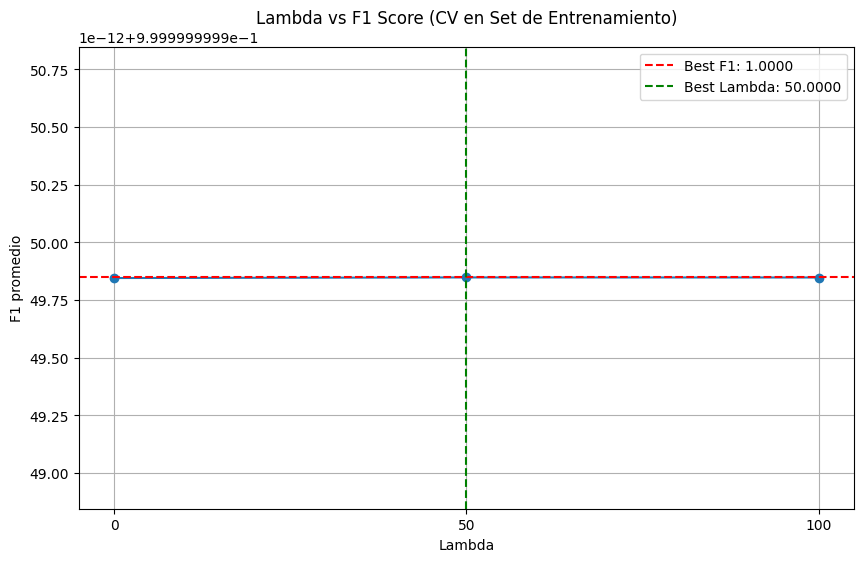

/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:37: RuntimeWarning: divide by zero encountered in matmul
  predictions = self.sigmoid(self.X @ w)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:37: RuntimeWarning: overflow encountered in matmul
  predictions = self.sigmoid(self.X @ w)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:37: RuntimeWarning: invalid value encountered in matmul
  predictions = self.sigmoid(self.X @ w)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:55: RuntimeWarning: divide by zero encountered in matmul
  self.y @ np.log(predictions) + (1 - self.y) @ np.log(1 - predictions)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:55: RuntimeWarning: overflow encountered in matmul
  self.y @ np.log(predictions) + (1 - self.y) @ np.log(1 - predictions)
/Users/agustinamblard/Desktop/Amblard_Agustin_TP2/Problema 1/src/models.py:55: Runtime

📊 Matriz de Confusión:
[[471  12   0]
 [ 78 484  69]
 [  0  14 568]]

✅ Métricas Globales:
Accuracy:        0.8980
Precision Macro: 0.8995
Recall Macro:    0.9060
F1 Score Macro:  0.8977

📈 AUC-ROC Macro (curva promediada): 0.9364
📈 AUC-PR  Macro (curva promediada): 0.8689


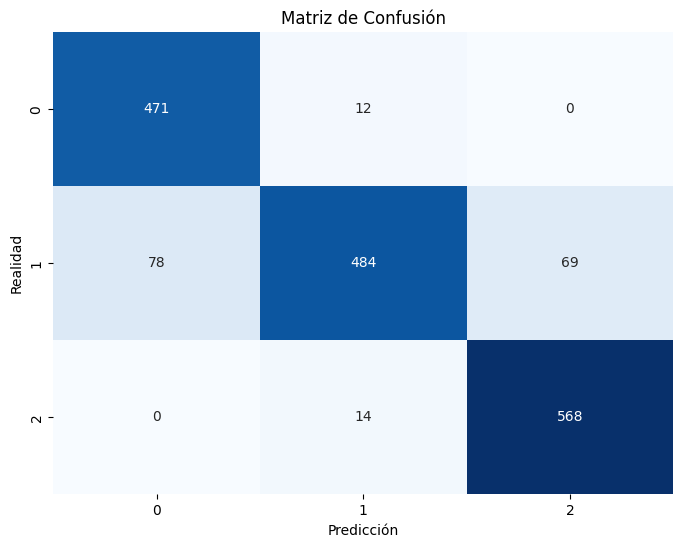

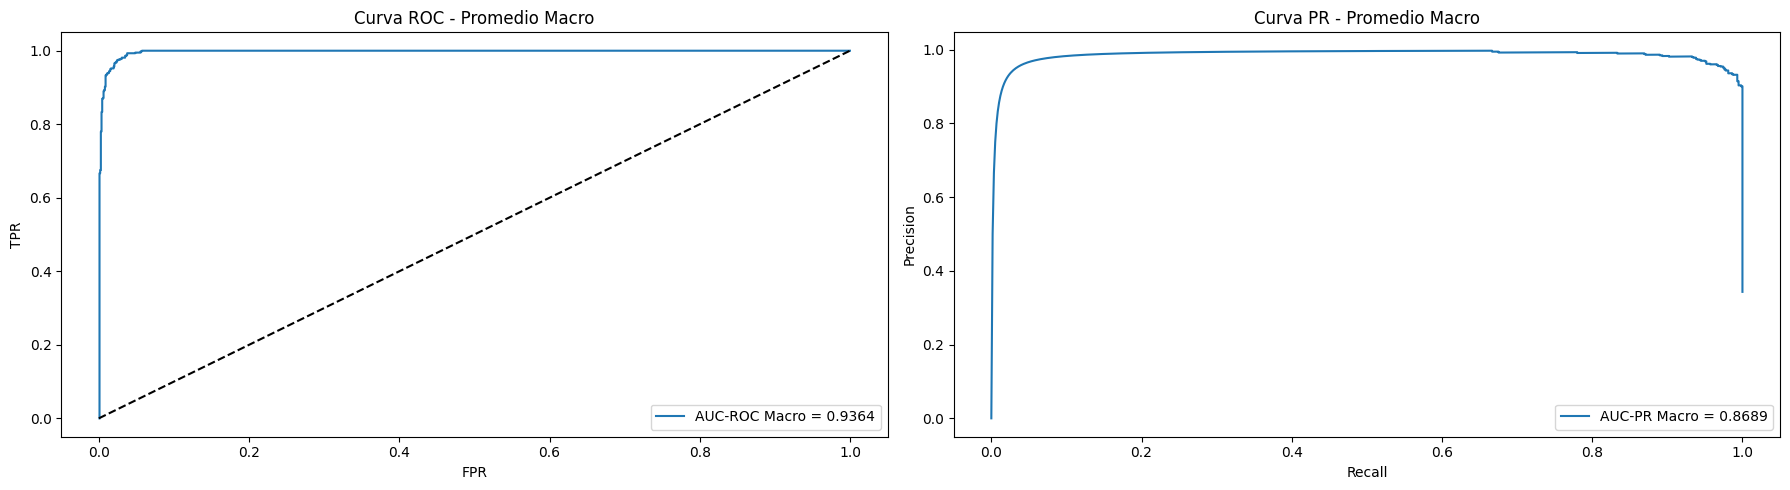

In [51]:
dev = pd.read_csv('Problema 2/data/processed/WAR_class_dev_complete.csv')
test = pd.read_csv('Problema 2/data/processed/WAR_class_test_complete.csv')

# Normalizar los datos
dev_mean = dev[features].mean()
dev_std = dev[features].std()
dev[features] = (dev[features] - dev_mean) / dev_std
test[features] = (test[features] - dev_mean) / dev_std

# cross validation para elegir hiperparametros
lambdas = np.linspace(0, 100, 3)
k = 3
train_data_for_cv = dev.copy()
indices = np.arange(len(train_data_for_cv))
np.random.seed(42)
np.random.shuffle(indices)
folds = np.array_split(indices, k)
best_lambda = None
best_f1 = -1
f1_scores_mean = [] 
for lam in lambdas:
    fold_f1_scores = []

    for i in range(k):
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        fold_train = dev.iloc[train_idx]
        fold_val = dev.iloc[val_idx]

        model = LogisticRegressionL2(dataset=fold_train,target_name='war_class',ridge_lambda=lam)

        y_pred = model.predict(fold_val[features].values)
        f1 = compute_f1(fold_val[target].values, y_pred)
        fold_f1_scores.append(f1)

    avg_f1 = np.mean(fold_f1_scores)
    f1_scores_mean.append(avg_f1)

    if avg_f1 > best_f1:
        best_f1 = avg_f1
        best_lambda = lam
print(f"\nMejor lambda: {best_lambda:.2f}, F1 promedio: {best_f1:.4f}")
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(lambdas, f1_scores_mean, marker='o')
plt.title('Lambda vs F1 Score (CV en Set de Entrenamiento)')
plt.xlabel('Lambda')
plt.ylabel('F1 promedio')
plt.grid()
plt.xticks(lambdas)
plt.axhline(y=best_f1, color='r', linestyle='--', label=f'Best F1: {best_f1:.4f}')
plt.axvline(x=best_lambda, color='g', linestyle='--', label=f'Best Lambda: {best_lambda:.4f}')
plt.legend()
plt.show()
# Entrenar modelo final con todo el training set y mejor lambda
final_model_logistic = LogisticRegressionL2(dataset=dev, target_name='war_class', ridge_lambda=best_lambda)
# Predecir en test
X_test_full = test[features].values
y_test_logistic = test[target].values
y_pred_test_logistic = final_model_logistic.predict(X_test_full)
y_scores_test_logistic = final_model_logistic.predict_proba(X_test_full)
# Reportar métricas

#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_test_logistic, y_pred_test_logistic, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

report_metrics_multiclass_global(y_test_logistic, y_pred_test_logistic, y_scores_test_logistic)

2.2.3)

Árboles: 5, Prof: 5, Split: 2, Feats: sqrt --> F1: 0.9546
Árboles: 5, Prof: 10, Split: 2, Feats: sqrt --> F1: 0.7256
Árboles: 10, Prof: 5, Split: 2, Feats: sqrt --> F1: 0.9291
Árboles: 10, Prof: 10, Split: 2, Feats: sqrt --> F1: 0.9657
Árboles: 5, Prof: 5, Split: 2, Feats: 5 --> F1: 0.9608
Árboles: 5, Prof: 10, Split: 2, Feats: 5 --> F1: 0.9601
Árboles: 10, Prof: 5, Split: 2, Feats: 5 --> F1: 0.9621
Árboles: 10, Prof: 10, Split: 2, Feats: 5 --> F1: 0.9644
Árboles: 5, Prof: 5, Split: 2, Feats: None --> F1: 0.9591
Árboles: 5, Prof: 10, Split: 2, Feats: None --> F1: 0.9607
Árboles: 10, Prof: 5, Split: 2, Feats: None --> F1: 0.9664
Árboles: 10, Prof: 10, Split: 2, Feats: None --> F1: 0.9608
Árboles: 5, Prof: 5, Split: 5, Feats: sqrt --> F1: 0.9599
Árboles: 5, Prof: 10, Split: 5, Feats: sqrt --> F1: 0.7857
Árboles: 10, Prof: 5, Split: 5, Feats: sqrt --> F1: 0.9547
Árboles: 10, Prof: 10, Split: 5, Feats: sqrt --> F1: 0.9501
Árboles: 5, Prof: 5, Split: 5, Feats: 5 --> F1: 0.9553
Árboles: 5, P

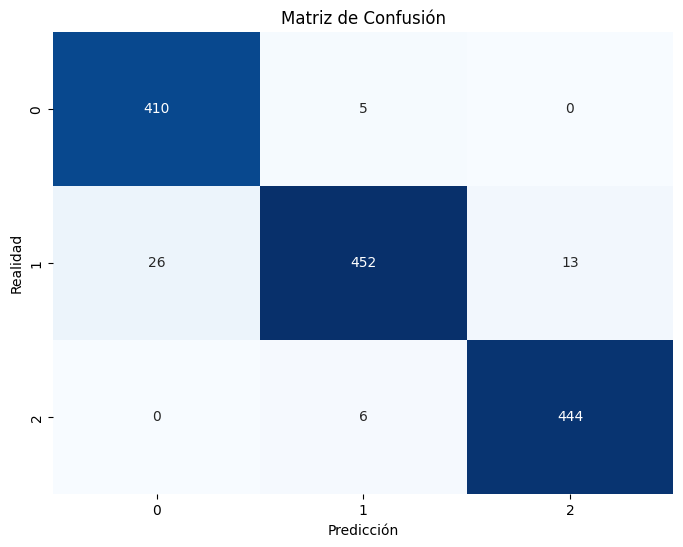

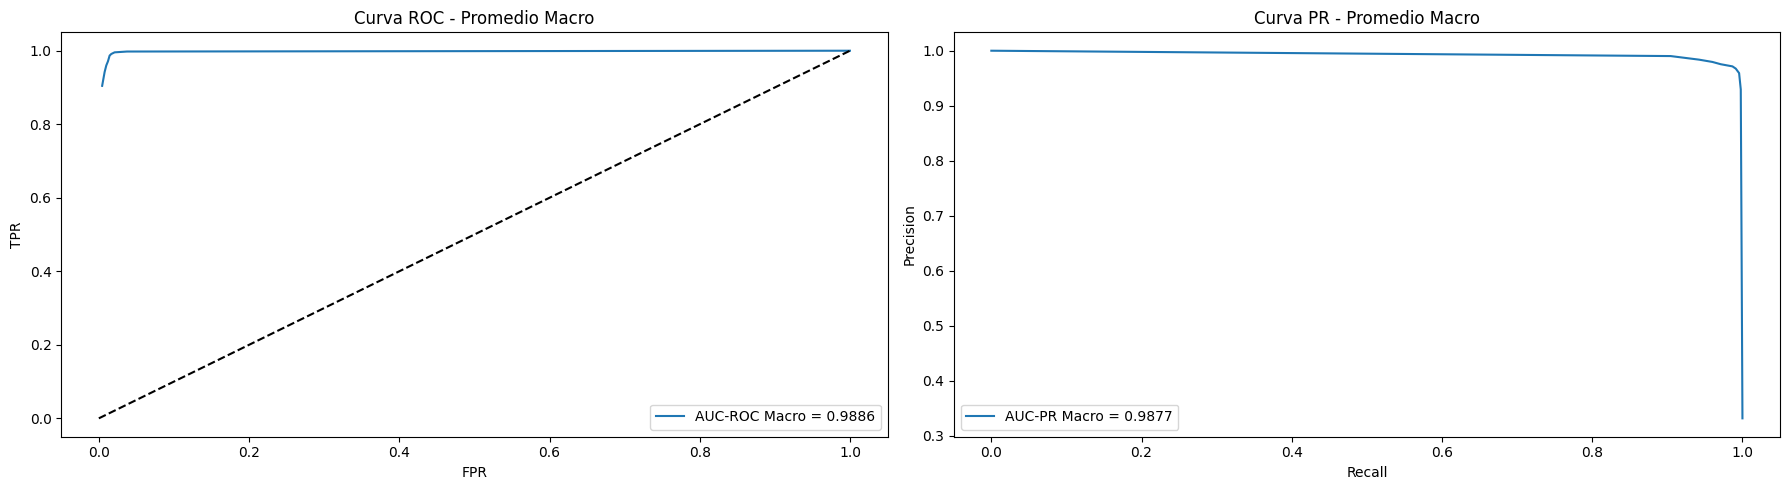

In [52]:
train = pd.read_csv('Problema 2/data/processed/WAR_class_train_complete.csv')
val = pd.read_csv('Problema 2/data/processed/WAR_class_val_complete.csv')


features = train.columns[train.columns != 'war_class']
target = 'war_class'

# Normalizar
train_mean = train[features].mean()
train_std = train[features].std()
train[features] = (train[features] - train_mean) / train_std
val[features] = (val[features] - train_mean) / train_std

X_train = train[features].values
y_train = train[target].values
X_val = val[features].values
y_val_dev_forest = val[target].values


classes = sorted(np.unique(y_train))

#grid search
best_f1 = -1
best_params = None
results = []


for min_samples_split in [2, 5]:
    for max_features in ['sqrt', 5, None]:
        for n_trees in [5, 10]:
            for max_depth in [5, 10]:
                forest = RandomForest(
                    n_estimators=n_trees,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    max_features=max_features
                )
                forest.fit(X_train, y_train)
                y_pred = forest.predict(X_val)
                

                f1 = f1_macro(y_val_dev_forest, y_pred, labels=classes)
                
                results.append((n_trees, max_depth, min_samples_split, max_features, f1))
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = (n_trees, max_depth, min_samples_split, max_features)
                    
                print(f"Árboles: {n_trees}, Prof: {max_depth}, Split: {min_samples_split}, Feats: {max_features} --> F1: {f1:.4f}")

print(f"\nMejor combinación: Árboles={best_params[0]}, Profundidad={best_params[1]}, Split={best_params[2]}, Feats={best_params[3]} --> F1 Macro={best_f1:.4f}")


forest = RandomForest(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    max_features=best_params[3]
)
forest.fit(X_train, y_train)
y_pred_dev_forest = forest.predict(X_val)

y_scores_dev_forest = forest.predict_proba(X_val)

#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_val_dev_forest, y_pred_dev_forest, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

report_metrics_multiclass_global(y_val_dev_forest, y_pred_dev_forest, y_scores_dev_forest)

Árboles: 5, Prof: 5, Split: 2, Feats: sqrt --> F1: 0.7527
Árboles: 5, Prof: 10, Split: 2, Feats: sqrt --> F1: 0.8999
Árboles: 10, Prof: 5, Split: 2, Feats: sqrt --> F1: 0.8212
Árboles: 10, Prof: 10, Split: 2, Feats: sqrt --> F1: 0.9207
Árboles: 5, Prof: 5, Split: 2, Feats: 5 --> F1: 0.9574
Árboles: 5, Prof: 10, Split: 2, Feats: 5 --> F1: 0.9596
Árboles: 10, Prof: 5, Split: 2, Feats: 5 --> F1: 0.9566
Árboles: 10, Prof: 10, Split: 2, Feats: 5 --> F1: 0.9638
Árboles: 5, Prof: 5, Split: 2, Feats: None --> F1: 0.9647
Árboles: 5, Prof: 10, Split: 2, Feats: None --> F1: 0.9614
Árboles: 10, Prof: 5, Split: 2, Feats: None --> F1: 0.9625
Árboles: 10, Prof: 10, Split: 2, Feats: None --> F1: 0.9622
Árboles: 5, Prof: 5, Split: 5, Feats: sqrt --> F1: 0.9619
Árboles: 5, Prof: 10, Split: 5, Feats: sqrt --> F1: 0.7397
Árboles: 10, Prof: 5, Split: 5, Feats: sqrt --> F1: 0.9119
Árboles: 10, Prof: 10, Split: 5, Feats: sqrt --> F1: 0.8165
Árboles: 5, Prof: 5, Split: 5, Feats: 5 --> F1: 0.9562
Árboles: 5, P

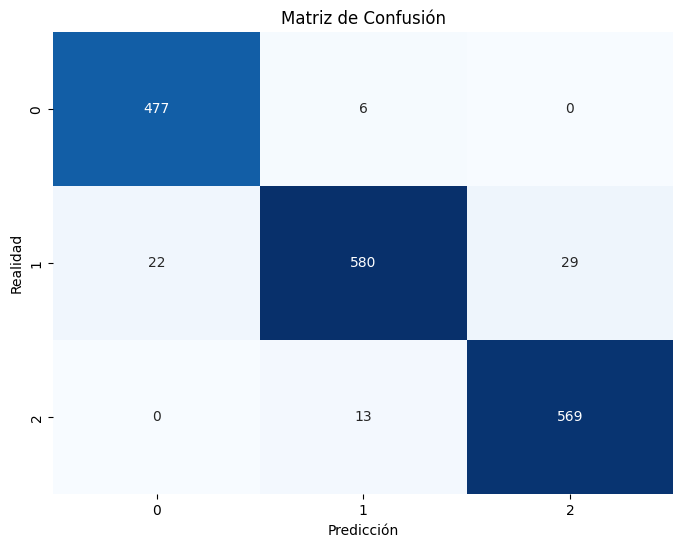

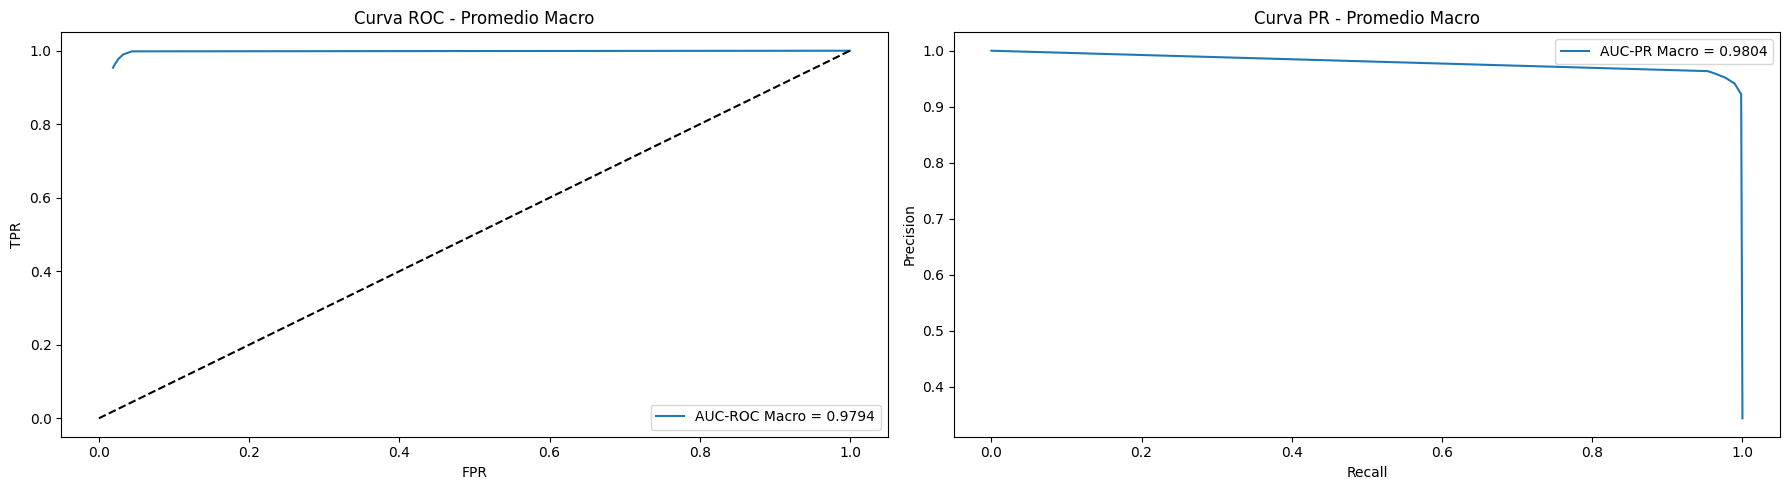

In [53]:
dev = pd.read_csv('Problema 2/data/processed/WAR_class_dev_complete.csv')
test = pd.read_csv('Problema 2/data/processed/WAR_class_test_complete.csv')

features = dev.columns[dev.columns != 'war_class']
target = 'war_class'

# Normalizar
dev_mean = dev[features].mean()
dev_std = dev[features].std()
dev[features] = (dev[features] - dev_mean) / dev_std
test[features] = (test[features] - dev_mean) / dev_std

X_dev = dev[features].values
y_dev = dev[target].values
X_test = test[features].values
y_test_forest = test[target].values


classes = sorted(np.unique(y_train))

#grid search
best_f1 = -1
best_params = None
results = []


for min_samples_split in [2, 5]:
    for max_features in ['sqrt', 5, None]:
        for n_trees in [5, 10]:
            for max_depth in [5, 10]:
                forest = RandomForest(
                    n_estimators=n_trees,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    max_features=max_features
                )
                forest.fit(X_dev, y_dev)
                y_pred_test_forest = forest.predict(X_test)
                

                f1 = f1_macro(y_test_forest, y_pred_test_forest, labels=classes)
                
                results.append((n_trees, max_depth, min_samples_split, max_features, f1))
                if f1 > best_f1:
                    best_f1 = f1
                    best_params = (n_trees, max_depth, min_samples_split, max_features)
                    
                print(f"Árboles: {n_trees}, Prof: {max_depth}, Split: {min_samples_split}, Feats: {max_features} --> F1: {f1:.4f}")

print(f"\nMejor combinación: Árboles={best_params[0]}, Profundidad={best_params[1]}, Split={best_params[2]}, Feats={best_params[3]} --> F1 Macro={best_f1:.4f}")


forest = RandomForest(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    max_features=best_params[3]
)
forest.fit(X_dev, y_dev)
y_pred_test_forest = forest.predict(X_test)

y_scores_test_forest = forest.predict_proba(X_test)

#graficar matriz de confusion
plt.figure(figsize=(8, 6))
cm = confusion_matrix_multiclass(y_test_forest, y_pred_test_forest, labels=[1, 2, 3])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')

report_metrics_multiclass_global(y_test_forest, y_pred_test_forest, y_scores_test_forest)

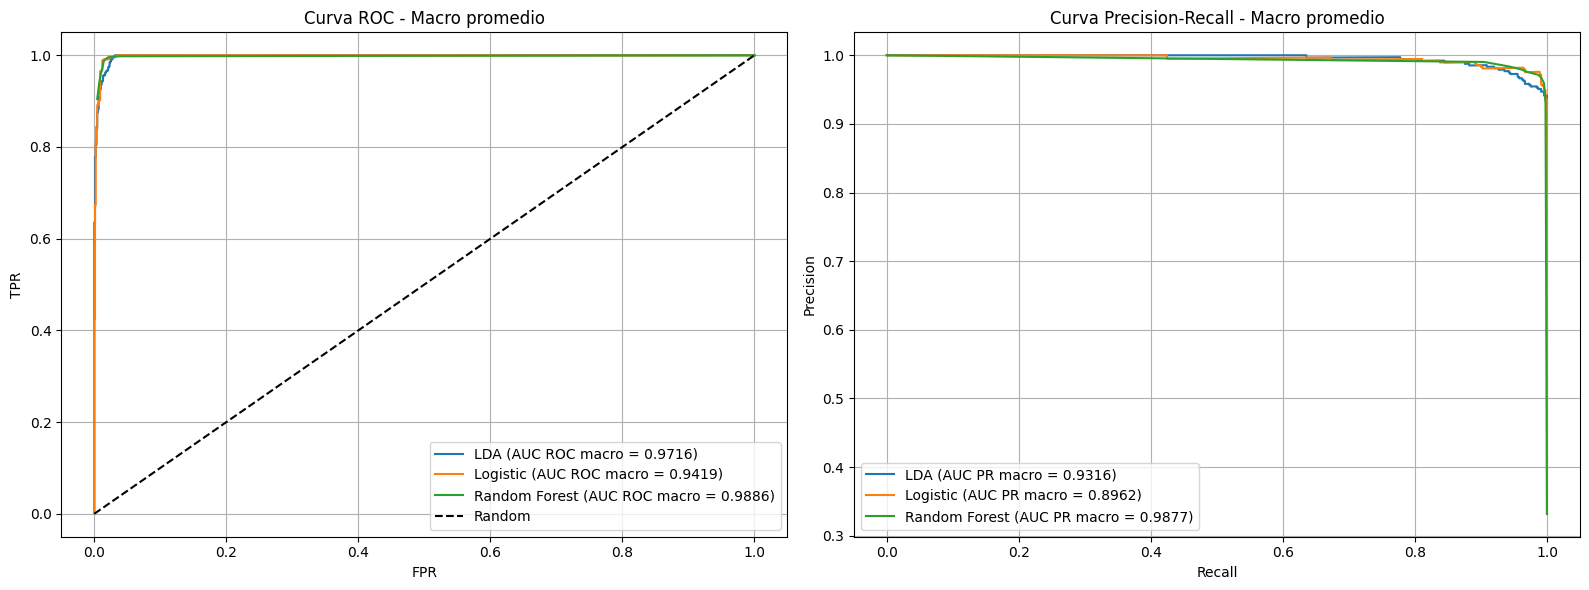

In [54]:


comparar_modelos_macro_roc_pr(
    modelos=[
        (y_val_dev_lda, y_scores_dev_lda),
        (y_val_dev_logistic, y_scores_dev_logistic),
        (y_val_dev_forest, y_scores_dev_forest),
    ],
    nombres_modelos=[
        "LDA",
        "Logistic",
         "Random Forest"
    ]
)



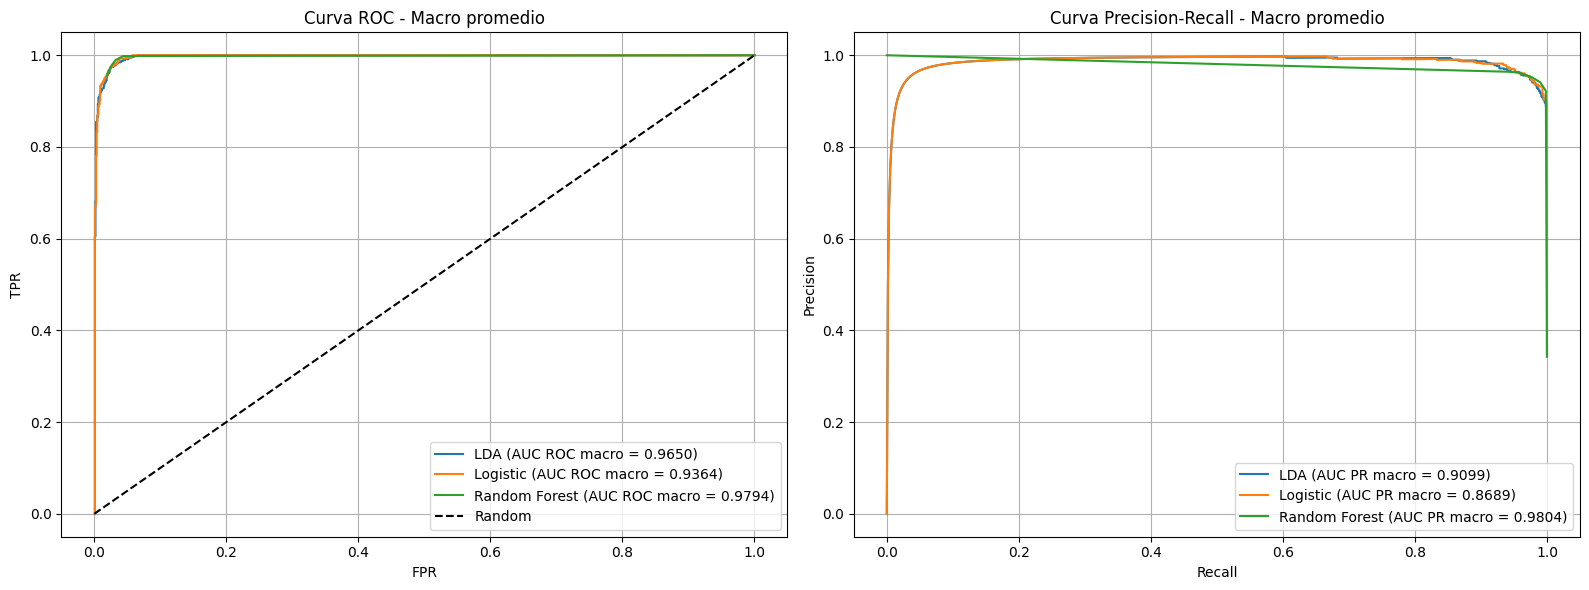

In [55]:
comparar_modelos_macro_roc_pr(
    modelos=[
        (y_test_lda, y_scores_test_lda),
        (y_test_logistic, y_scores_test_logistic),
         (y_test_forest, y_scores_test_forest),
    ],
    nombres_modelos=[
        "LDA",
        "Logistic",
         "Random Forest"
    ]
)